In [1]:
import numpy as np
import pandas as pd
import torch
# get the image from the dataset
import torch
from PIL import Image
import torchvision.transforms as transforms

/Users/maximeszymanski/PycharmProjects/MinecraftScrapping/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# get the images in images folder, and save them in tensorfor folder in os.listdir('images'):
import os
import cv2
i = 0
for folder in os.listdir('images'):
    if folder == '.DS_Store':
        continue
    for file in os.listdir('images/' + folder):
        if file == '.DS_Store':
            continue
        img = cv2.imread('images/' + folder + '/' + file)
        print(f'image name: {file}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resize the image to 120x120
        img = cv2.resize(img, (128, 128))
        # save the image
        cv2.imwrite('images/tensors/' + str(i) + '.jpg', img)
        transform = transforms.Compose([
            transforms.ToTensor()
        ])

        img = transform(img)
        img.requires_grad = True
        print(f'img shape: {img.shape}')
        img = img.unsqueeze(0)
        if i == 0:
            images = img
        else:
            images = torch.cat((images, img), 0)
        i += 1

print(f"images shape: {images.shape}")


image name: tang-style.png
img shape: torch.Size([3, 128, 128])
image name: minimalist-gothic.png
img shape: torch.Size([3, 128, 128])
image name: traditional-house.png
img shape: torch.Size([3, 128, 128])
image name: fantasy-unfurnished.png
img shape: torch.Size([3, 128, 128])
image name: wood-elf.png
img shape: torch.Size([3, 128, 128])
image name: troll-hut.png
img shape: torch.Size([3, 128, 128])
image name: spruce-medieval.png
img shape: torch.Size([3, 128, 128])
image name: fantasy-staircase.png
img shape: torch.Size([3, 128, 128])
image name: nordic-unfurnished.png
img shape: torch.Size([3, 128, 128])
image name: priests-rest.png
img shape: torch.Size([3, 128, 128])
image name: fantasy-gatehouse.png
img shape: torch.Size([3, 128, 128])
image name: unfurnished-medieval.png
img shape: torch.Size([3, 128, 128])
image name: medieval-grocery.png
img shape: torch.Size([3, 128, 128])
image name: fantasy-window.png
img shape: torch.Size([3, 128, 128])
image name: medieval-rustic.png
img

In [4]:
from torch import nn
class Discriminator(nn.Module):
    def __init__(self,channels=3):
        # simple discriminator, input is batch_size * 128*128*3, output is 1x1x1
        super(Discriminator, self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(self.channels, 16, 4, 2, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 4, 2, 1)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 4, 2, 1)
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 4, 2, 1)
        self.batch_norm4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 1, 4, 2, 1)
        self.flatten = nn.Flatten()
        self.classes = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.batch_norm1(x)
        x = self.conv2(x)
        x = self.leaky_relu(x)
        x = self.batch_norm2(x)
        x = self.conv3(x)
        x = self.leaky_relu(x)
        x = self.batch_norm3(x)
        x = self.conv4(x)
        x = self.leaky_relu(x)
        x = self.batch_norm4(x)
        x = self.conv5(x)
        x = self.leaky_relu(x)
        x = self.flatten(x)
        x = self.classes(x)
        x = self.sigmoid(x)

        return x

"""dummy_input = torch.randn(1, 3, 128, 128)
discriminator = Discriminator()
print(discriminator)
print(discriminator(dummy_input))"""

'dummy_input = torch.randn(1, 3, 128, 128)\ndiscriminator = Discriminator()\nprint(discriminator)\nprint(discriminator(dummy_input))'

In [5]:
from torch import nn
import PIL
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
class Generator(nn.Module):
    def __init__(self):
        # simple generator, input is batch_size * 100, output is batch_size * 180x180x3
        super(Generator, self).__init__()
        self.generator_layers = nn.Sequential(
            nn.ConvTranspose2d(128, 512, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(512),

            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 3, 4, 2, 1),


            nn.Tanh()
        )

    def forward(self, x):

        x = x.view(-1, 128, 1, 1)
        x = self.generator_layers(x)

        return x

"""dummy_input = torch.randn(1, 128)
generator = Generator()
print(generator)
print(generator(dummy_input).shape)
# plot the generated image
image = PIL.Image.fromarray(np.uint8(generator(dummy_input).detach().numpy()[0].transpose(1, 2, 0) * 255))
plt.imshow(image)"""

'dummy_input = torch.randn(1, 128)\ngenerator = Generator()\nprint(generator)\nprint(generator(dummy_input).shape)\n# plot the generated image\nimage = PIL.Image.fromarray(np.uint8(generator(dummy_input).detach().numpy()[0].transpose(1, 2, 0) * 255))\nplt.imshow(image)'

In [108]:
number_of_images = len(os.listdir('images/tensors'))
print(f'number of real images: {number_of_images}')
random_noise = torch.randn(number_of_images, 128,requires_grad=True)
print(f'random noise shape: {random_noise.shape}')
print(f'real image shape : {images.shape}')

number of real images: 283
random noise shape: torch.Size([283, 128])
real image shape : torch.Size([283, 3, 128, 128])


In [7]:
#create a dataset with real images and fake images
generator = Generator()
discriminator = Discriminator()



In [8]:
# create a uniform distribution of random noise
def generate_random_noise(batch_size, noise_size):
    return torch.randn(batch_size, noise_size)


generator loss: 0.021215029060840607
discriminator loss: 0.0005676640430465341


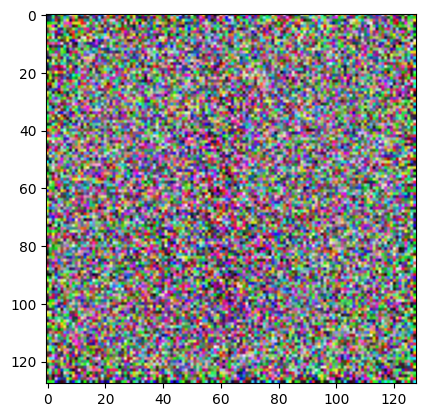

generator loss: 0.001124112051911652
discriminator loss: 9.81458924798062e-07


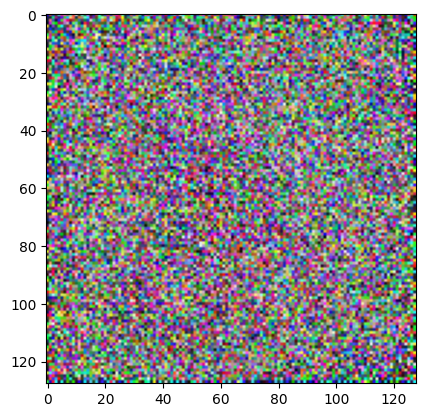

KeyboardInterrupt: 

In [12]:
# import shuffle from sklearn
from sklearn.utils import shuffle
number_of_training_iterations = 1000
number_of_steps = 5
lr = 0.0002
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

batch_size = 8
for num_itarion in range(number_of_training_iterations):
    for k in range(number_of_steps):
        noises = generate_random_noise(batch_size, 128)
        real_images = images[k * batch_size:(k + 1) * batch_size]
        fake_images = generator(noises)
        X_train = torch.cat((real_images, fake_images), 0)
        y_train = torch.cat((torch.ones(batch_size, 1), torch.zeros(batch_size, 1)), 0)
        X_train, y_train = shuffle(X_train, y_train)
        outputs = discriminator(X_train)
        discriminator_optimizer.zero_grad()
        discriminator_loss = nn.BCELoss()(outputs, y_train)
        discriminator_loss.backward()
        discriminator_optimizer.step()
    noises = generate_random_noise(batch_size, 128)
    fake_images = generator(noises)
    outputs = discriminator(fake_images)
    generator_optimizer.zero_grad()
    generator_loss = nn.BCELoss()(outputs, torch.ones(batch_size, 1))
    generator_loss.backward()
    generator_optimizer.step()
    if num_itarion % 100 == 0:
        print(f'generator loss: {generator_loss}')
        print(f'discriminator loss: {discriminator_loss}')
        image = PIL.Image.fromarray(np.uint8(fake_images.detach().numpy()[0].transpose(1, 2, 0) * 255))
        plt.imshow(image)
        plt.show()




